In [25]:
import pandas as pd
import os
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from IPython.display import HTML
### Testing For Stationarity
from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

In [8]:
data = pd.read_csv("orderdata.csv",delimiter=',')
#If count is zero then data count is actaully 1
data['Count']= data['Count'].replace(0,1)


In [9]:
data.head()

,Unnamed: 0,Id,time,Count
0,3221,374,2021-01-16 05:00:00.000,2
1,3222,374,2021-01-16 05:00:00.000,1
2,3223,374,2021-01-16 05:00:00.000,1
3,3224,374,2021-01-16 05:00:00.000,1
4,3225,374,2021-01-16 05:00:00.000,1


In [11]:
#Let's see the data types of data frame
data.dtypes


Unnamed: 0             int64
Id                     int64
time                  object
Count                  int64
MaxTime       datetime64[ns]
dtype: object

In [10]:
#Convert time into date time
data["MaxTime"] = pd.to_datetime(data["time"])

In [12]:
#Drop unneccary columns
data.drop(columns=['Unnamed: 0','time'],axis=1,inplace=True)

<AxesSubplot:xlabel='MaxTime'>

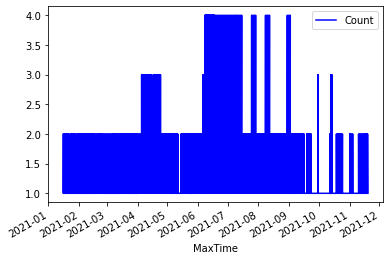

In [13]:
data.plot(x='MaxTime',y='Count',kind='line',color='blue')

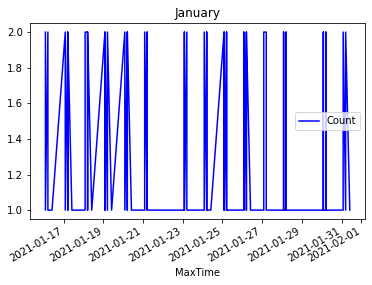

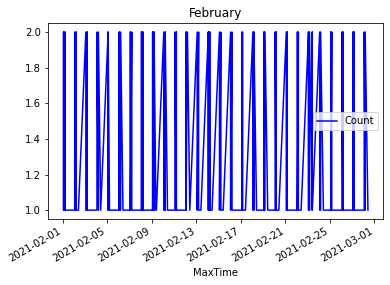

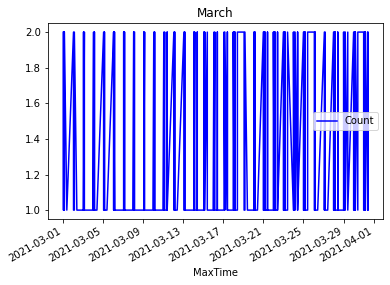

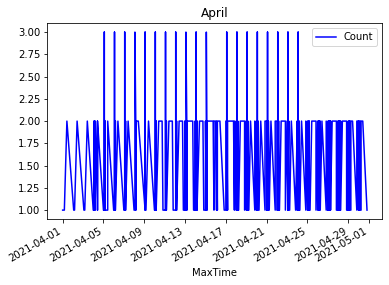

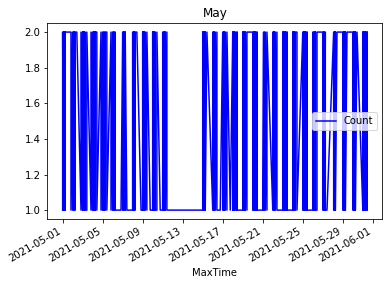

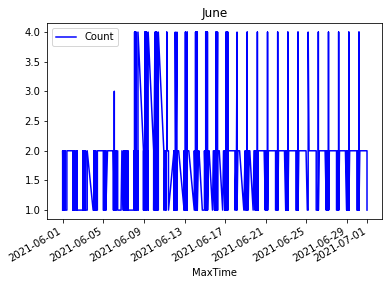

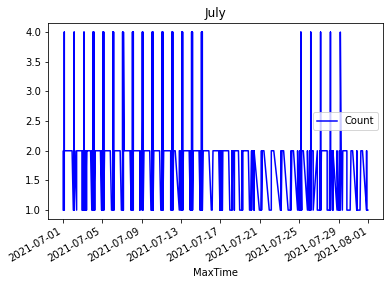

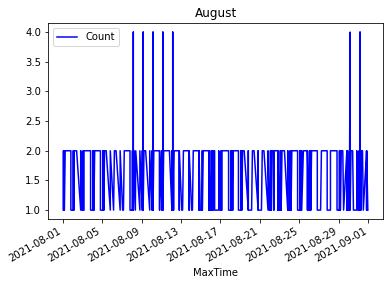

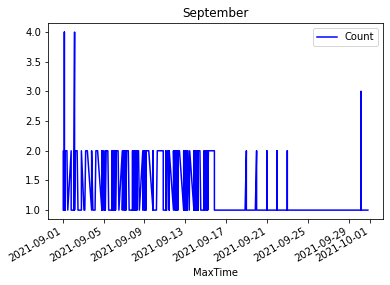

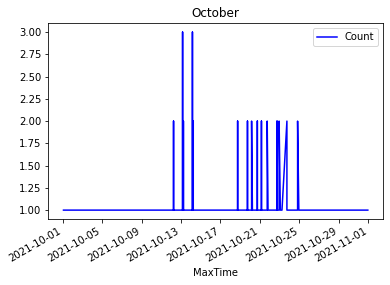

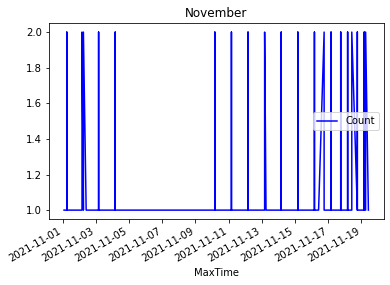

In [14]:
months = ['January','February','March','April','May','June','July','August','September','October','November']
for m in months:
    datamonth = data.loc[data['MaxTime'].dt.month_name() == m]     
    datamonth.plot(x='MaxTime',y='Count',kind='line',color='blue',title=str(m))

In [16]:
## Resmaple the data based on hourly, Id
#This fill non existent with 0 

data.set_index(['MaxTime'],inplace = True)
data1 = data.groupby(['Id']).resample('H')['Count'].sum()
data2 = pd.DataFrame(data1)
data2.reset_index(inplace=True)

In [19]:
print(data.count)

<bound method DataFrame.count of                       Id  Count
MaxTime                        
2021-01-16 05:00:00  374      2
2021-01-16 05:00:00  374      1
2021-01-16 05:00:00  374      1
2021-01-16 05:00:00  374      1
2021-01-16 05:00:00  374      1
...                  ...    ...
2021-11-19 02:00:00  374      1
2021-11-19 02:00:00  374      1
2021-11-19 02:00:00  374      1
2021-11-19 06:00:00  374      1
2021-11-19 06:00:00  374      2

[24021 rows x 2 columns]>


In [20]:
data2.drop(columns=['Id'],axis=1,inplace=True)

In [21]:
data2.head()

,MaxTime,Count
0,2021-01-16 02:00:00,17
1,2021-01-16 03:00:00,0
2,2021-01-16 04:00:00,0
3,2021-01-16 05:00:00,7
4,2021-01-16 06:00:00,0


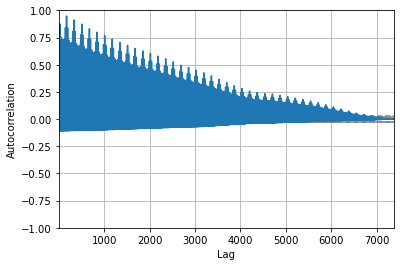

In [23]:
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(data2['Count'])
plt.show()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [28]:
data2.head()

,MaxTime,Count
0,2021-01-16 02:00:00,17
1,2021-01-16 03:00:00,0
2,2021-01-16 04:00:00,0
3,2021-01-16 05:00:00,7
4,2021-01-16 06:00:00,0


In [33]:
data2.dtypes

Count    int64
dtype: object

In [30]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [31]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(ordercount):
    result=adfuller(ordercount)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [34]:
adfuller_test(data2['Count'])

ADF Test Statistic : -9.795462898404935
p-value : 6.191497304982239e-17
#Lags Used : 31
Number of Observations Used : 7345
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
